# Segmentation

In [2]:
import pandas as pd
import numpy as np
import scipy as sci
from pylab import rcParams
import seaborn as ab
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
rawDataFollowers = pd.read_csv('DataSources/Twitter/Data.csv', index_col = 0)

In [4]:
rawDataFollowers

,@TWZHM,@TW3NH,@TWENE,@TWF3T,@TWXAI,@TWUFB,@TWSEZ,@TWOCJ,@TWX9I,@TWIJH,...,@TWXGK,@TWBED,@TWAND,@TW5I7,@TWI2V,@TW2XQ,@TWEYT,@TWSX4,@TWMHV,@TWGKJ
@TW0LF,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@TWLRX,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,1
@TWDTN,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
@TWIRG,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
@TWB9C,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
@TWYYD,1,0,0,0,0,1,1,1,0,0,...,0,0,1,1,1,1,0,0,0,1
@TWFJ3,1,0,1,1,0,1,1,1,0,1,...,0,1,0,0,0,0,0,0,1,1
@TWXQZ,1,1,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
@TW4UW,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
@TWPSX,1,1,1,1,1,1,1,0,1,1,...,1,1,1,0,1,0,1,1,1,1


In [6]:
clusteringMatrix = sci.spatial.distance.pdist(rawDataFollowers, metric ='cosine')

In [47]:
clusteringMatrixSquare = sci.spatial.distance.squareform(clusteringMatrix)

In [48]:
print(clusteringMatrixSquare)

[[0.         0.80380603 0.80191951 0.78185135 0.78518206 0.67115942
  0.69065035 0.75761261 0.7908136  0.61232183 0.71382021 0.59744929
  0.62998442 0.73650051 0.76300832 0.67094705 0.68135427 0.75793539
  0.6586     0.62388788 0.78520223 0.66509917 0.59721748 0.66165606
  0.78520223 0.76674071 0.78083434 0.72928213 0.66716544 0.75383321]
 [0.80380603 0.         0.73683006 0.8032652  0.78724181 0.67070172
  0.64469102 0.82668601 0.77322285 0.57918751 0.72347726 0.57656784
  0.63120971 0.67466784 0.75231211 0.6528812  0.70564064 0.79951753
  0.63250259 0.60711316 0.79245052 0.64292446 0.60351194 0.66469064
  0.82075272 0.77461197 0.78352402 0.74292747 0.61966931 0.76214003]
 [0.80191951 0.73683006 0.         0.79191507 0.81139162 0.62670633
  0.64696856 0.76826906 0.80588364 0.59969946 0.6840839  0.57498177
  0.66177072 0.72509291 0.76408532 0.64954344 0.6618185  0.80240906
  0.68155597 0.57606462 0.79045481 0.60006029 0.59233197 0.60786529
  0.78093003 0.78637669 0.82895498 0.77688285 

In [7]:
Z = linkage(clusteringMatrix, 'single')

<function matplotlib.pyplot.show(*args, **kw)>

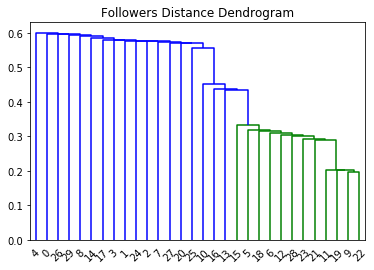

In [8]:
dendrogram(
            Z,
            distance_sort='descending',
            show_leaf_counts=True
            )
plt.title("Followers Distance Dendrogram")
plt.show